<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
Bagging Regressor MSE: 13999902.45820869
Boosting Regressor MSE: 10723799.598244198
Stacking R

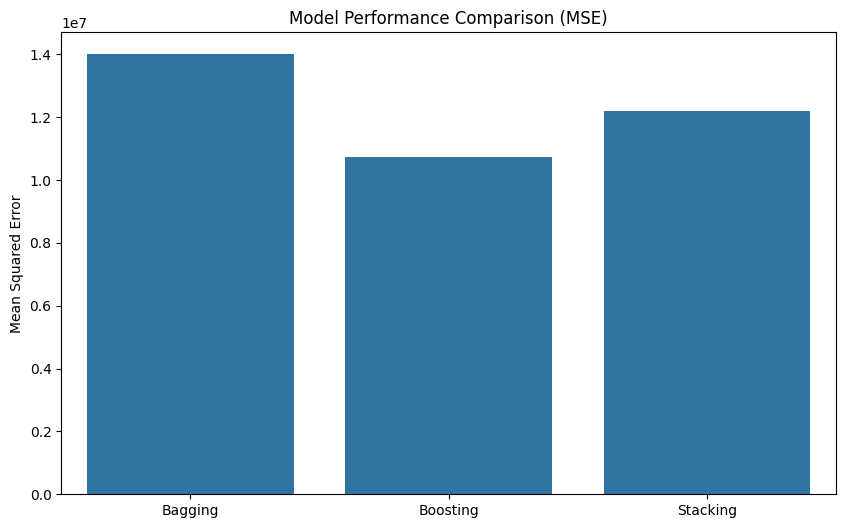

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading dataset
data = pd.read_csv('bank.csv')

print(data.info())

# using balance column
X = data.drop('balance', axis=1)
y = data['balance']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ensemble methods
bagging_regressor = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=10, random_state=42)
boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
stacking_regressor = StackingRegressor(estimators=[
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('lr', LinearRegression())
], final_estimator=LinearRegression())

# Training
bagging_regressor.fit(X_train, y_train)
boosting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

# Making predictions
y_pred_bagging = bagging_regressor.predict(X_test)
y_pred_boosting = boosting_regressor.predict(X_test)
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluating models on MSE
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

# OUTPUT
print(f"Bagging Regressor MSE: {mse_bagging}")
print(f"Boosting Regressor MSE: {mse_boosting}")
print(f"Stacking Regressor MSE: {mse_stacking}")

# Visualization
mse_results = {
    'Bagging': mse_bagging,
    'Boosting': mse_boosting,
    'Stacking': mse_stacking
}

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mse_results.keys()), y=list(mse_results.values()))
plt.title("Model Performance Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()
